In [8]:
import numpy as np
# Importing standard Qiskit libraries
from qiskit import QuantumCircuit, transpile, Aer, IBMQ, execute
from qiskit.tools.jupyter import *
from qiskit.visualization import *
from ibm_quantum_widgets import *
%matplotlib inline
# Loading your IBM Quantum account(s)
provider = IBMQ.load_account()

ibmqfactory.load_account:WARNING:2021-07-20 13:10:30,458: Credentials are already in use. The existing account in the session will be replaced.


In [2]:
circuit = QuantumCircuit(2,1)

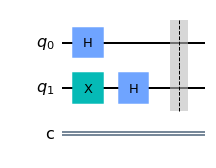

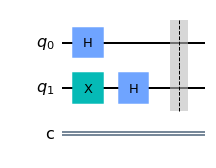

In [3]:
circuit.h(0)
circuit.x(1)
circuit.h(1)
circuit.barrier()
circuit.draw(output='mpl')

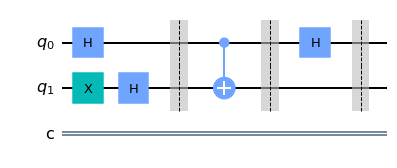

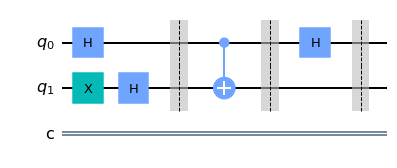

In [4]:
circuit.cx(0,1)
circuit.barrier()
circuit.h(0)
circuit.barrier()
circuit.draw(output='mpl')

In [5]:
circuit.measure(0,0)

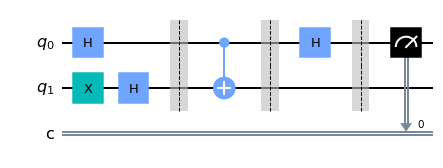

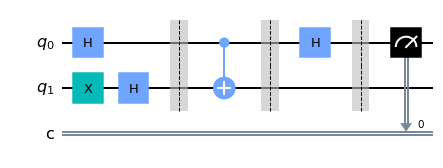

In [6]:
circuit.draw(output='mpl')

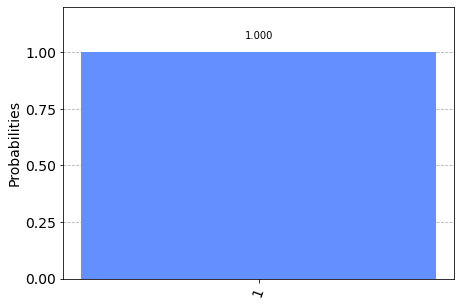

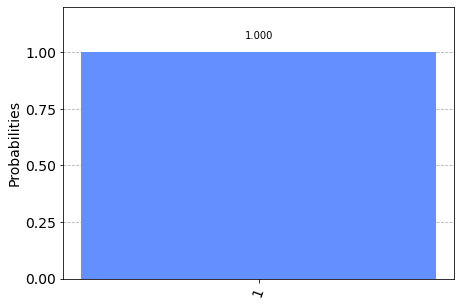

In [9]:
backend = Aer.get_backend('qasm_simulator')
result = execute(circuit, backend=backend, shots=1024).result()
counts = result.get_counts(circuit)

plot_histogram([counts])

In [10]:
#Real Quantum Computer
#IBMQ.load_account()

In [11]:
provider = IBMQ.get_provider("ibm-q")

In [12]:
for backend in provider.backends():
    try:
        qubit_count = len(backend.properties().qubits)
    except:
        qubit_count = "simulated"
    print(f"{backend.name()} : {backend.status().pending_jobs} & {qubit_count} qubits")

ibmq_qasm_simulator : 4 & simulated qubits
ibmq_armonk : 0 & 1 qubits
ibmqx2 : 1 & 5 qubits
simulator_statevector : 5 & simulated qubits
simulator_mps : 5 & simulated qubits
ibmq_santiago : 11 & 5 qubits
ibmq_belem : 2 & 5 qubits
ibmq_lima : 5 & 5 qubits
ibmq_quito : 14 & 5 qubits
ibmq_bogota : 4 & 5 qubits
simulator_extended_stabilizer : 4 & simulated qubits
simulator_stabilizer : 4 & simulated qubits
ibmq_manila : 11 & 5 qubits


In [13]:
quantum_computer = provider.get_backend('ibmq_belem')

In [14]:
quantum_result = execute(circuit, backend=quantum_computer,shots=1024).result()

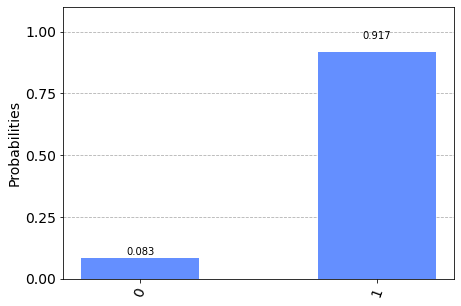

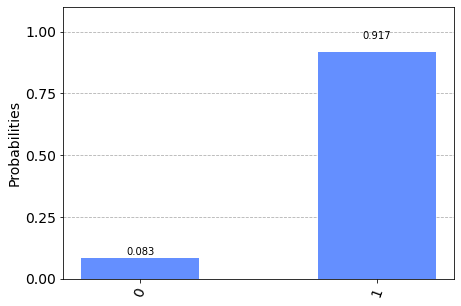

In [15]:
quantum_counts = quantum_result.get_counts(circuit)
plot_histogram([quantum_counts])